<a href="https://colab.research.google.com/github/divyabala-ai/fruits-image-classification/blob/main/fruits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import os
import cv2
import shutil
import random
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
drive.mount('/content/drive', force_remount=True) #force_remount added to ensure a fresh mount

Mounted at /content/drive


In [ ]:
# Copy the zip files from Google drive to Colab environment
!cp /content/drive/MyDrive/fruits-360.zip /content/

In [ ]:
# Unzip thefiles in Colab environment

# Path to your uploaded zip file
zip_file_path = '/content/fruits-360.zip'

# Path to unzip the contents to
extract_to_path = '/content/fruits-360/'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("File unzipped successfully.")


File unzipped successfully.


In [ ]:
# Check if directories exist
training_folder = '/content/fruits-360/content/drive/MyDrive/fruits-360/Training'
validation_folder = '/content/fruits-360/content/drive/MyDrive/fruits-360/Validation'
test_folder = '/content/fruits-360/content/drive/MyDrive/fruits-360/Test'

# Print the number of folders
print("Number of training folders: ",len(os.listdir(training_folder)))
print("Number of validation folders: ",len(os.listdir(validation_folder)))
print("Number of test folders: ",len(os.listdir(test_folder)))

# List files in these directories
print("Training data:", os.listdir(training_folder)[:5])  # Show first 5 files in the training folder
print("Validation data:", os.listdir(validation_folder)[:5])  # Show first 5 files in the validation folder
print("Test data:", os.listdir(test_folder)[:5])  # Show first 5 files in the test folder


Number of training folders:  164
Number of validation folders:  164
Number of test folders:  164
Training data: ['Apple Braeburn 1', 'Peach 2', 'Nectarine 1', 'Granadilla 1', 'Strawberry Wedge 1']
Validation data: ['Apple Braeburn 1', 'Peach 2', 'Nectarine 1', 'Granadilla 1', 'Strawberry Wedge 1']
Test data: ['Apple Braeburn 1', 'Peach 2', 'Nectarine 1', 'Granadilla 1', 'Strawberry Wedge 1']


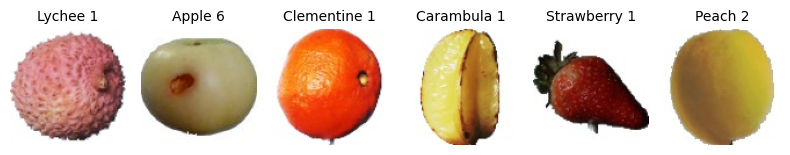

In [ ]:
# Display first image from selected fruit folders

# Define the specific fruits (folders) you want to display images from
specific_fruits = ['Lychee 1', 'Apple 6','Clementine 1', 'Carambula 1', 'Strawberry 1', 'Peach 2']

# Create a figure for displaying the images
plt.figure(figsize=(8,4))

# Loop through each fruit type (folder)
for i, fruit in enumerate(specific_fruits):
    fruit_folder = os.path.join(training_folder, fruit)

    # List all image files in the folder
    if os.path.isdir(fruit_folder):
        fruit_images = os.listdir(fruit_folder)

        # Read and display the first image from the folder
        img_path = os.path.join(fruit_folder, fruit_images[0])
        img = mpimg.imread(img_path)

        # Plot the image in a subplot
        plt.subplot(1,6, i + 1)  # Arrange in a grid
        plt.imshow(img)
        plt.axis('off')  # Hide the axes
        plt.title(fruit, fontsize=10)  # Title as the fruit name

plt.tight_layout()  # Ensure that the images don't overlap
plt.show()

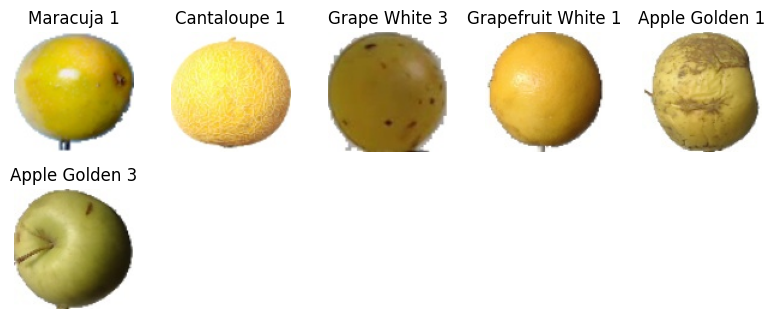

In [ ]:
# Display yellow colored fruits

# Define yellow color range in HSV
lower_yellow = np.array([20, 100, 100])  # Lower bound of yellow in HSV
upper_yellow = np.array([40, 255, 255])  # Upper bound of yellow in HSV

# Get the list of fruit categories (folders) in the directory
fruit_types = os.listdir(training_folder)

# Initialize the figure for displaying the images
plt.figure(figsize=(8,8))

image_counter = 1

# Iterate over the folders
for fruit in fruit_types:
    fruit_folder = os.path.join(training_folder, fruit)

    img_files = os.listdir(fruit_folder)

    img_path = os.path.join(fruit_folder, img_files[0])  # Load the first image
    img = cv2.imread(img_path)  # Read the image

    # Convert the image from BGR to HSV (OpenCV loads images in BGR by default)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Create a mask for yellow pixels
    mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

    # Count the number of yellow pixels
    yellow_pixels = cv2.countNonZero(mask)

    # Check if the number of yellow pixels is more than 50% of the total pixels
    if yellow_pixels > (img.shape[0] * img.shape[1]) * 0.5:
       plt.subplot(5, 5, image_counter)
       plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
       plt.axis('off')
       plt.title(f"{fruit}")
       image_counter += 1

# Display the images
plt.tight_layout()
plt.show()


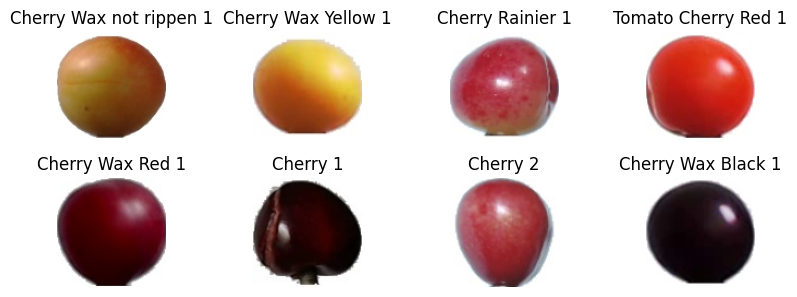

In [ ]:
# Display a random cherry image from each cherry folder

# Initialize the figure for displaying the images
plt.figure(figsize=(8,6))

image_counter = 1

# Iterate over the folders
for fruit in fruit_types:
    # Check if 'cherry' is in the folder name
    if 'cherry' in fruit.lower():  # Case-insensitive search for folders containing 'peach'
        fruit_folder = os.path.join(training_folder, fruit)

        img_files = os.listdir(fruit_folder)


        random_img = random.choice(img_files)  # Choose a random image
        img_path = os.path.join(fruit_folder, random_img)  # Get the full path
        img = cv2.imread(img_path)  # Read the image

        # Convert from BGR (OpenCV format) to RGB (for Matplotlib display)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.subplot(4, 4, image_counter)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(f"{fruit}")
        image_counter += 1

# Display all images
plt.tight_layout()
plt.show()

In [ ]:
# Set Up Data Generators for Training and Validation

# Define the data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize the image pixels to the range [0, 1]
    rotation_range=30,          # Random rotations from -30 to +30 degrees
    width_shift_range=0.2,      # Random horizontal shift (20%)
    height_shift_range=0.2,     # Random vertical shift (20%)
    shear_range=0.2,            # Shearing transformations
    zoom_range=0.2,             # Random zoom
    horizontal_flip=True,       # Random horizontal flip
    fill_mode='nearest'         # Fill missing pixels after transformation
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Validation data should only be rescaled

batch_size = 16

# Create the training data generator
train_generator = train_datagen.flow_from_directory(
    training_folder,           # Path to the training data
    target_size=(100, 100),     # Resize all images to 100x100
    batch_size=batch_size,      # Number of images per batch
    class_mode='categorical',    # For multi-class classification
    shuffle=True
)

# Create the validation data generator
validation_generator = val_datagen.flow_from_directory(
    validation_folder,         # Path to the validation data
    target_size=(100, 100),     # Resize all images to 100x100
    batch_size=batch_size,      # Number of images per batch
    class_mode='categorical',    # For multi-class classification
    shuffle=False
)


Found 61277 images belonging to 164 classes.
Found 21119 images belonging to 164 classes.


In [ ]:
# CNN model 1

# Build the CNN model

# Get the number of classes from the train_generator
cnn_model_1 =  tf.keras.Sequential([
    Input(shape=(100, 100, 3)), # Explicitly define input shape using the Input layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer (number of classes)
])

# Compile the model
cnn_model_1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_1 = cnn_model_1.fit(
    train_generator,  # The training data generator
    epochs=4,        # Number of epochs
    validation_data=validation_generator,  # The validation data generator
    verbose=1
)

# Evaluate the model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_folder,           # Path to the test data
    target_size=(100, 100),  # Resize all images to 100x100
    batch_size=batch_size,            # Number of images per batch
    class_mode='categorical',  # For multi-class classification
    shuffle=False             # Make sure to keep the order of images to match predictions
)

# Get the true labels
y_true = test_generator.classes

# Predict the classes using the trained model
y_pred_1 = cnn_model_1.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert the predictions from probabilities to class labels
y_pred_classes_1 = np.argmax(y_pred_1, axis=1)

# Print the classification report
report_1 = classification_report(y_true, y_pred_classes_1, target_names=test_generator.class_indices.keys())
print("Model 1 Classification Report:\n", report_1)

Epoch 1/4


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3830/3830 ━━━━━━━━━━━━━━━━━━━━ 228s 59ms/step - accuracy: 0.4647 - loss: 2.0743 - val_accuracy: 0.9264 - val_loss: 0.2080
Epoch 2/4
3830/3830 ━━━━━━━━━━━━━━━━━━━━ 225s 59ms/step - accuracy: 0.8815 - loss: 0.3506 - val_accuracy: 0.9615 - val_loss: 0.1165
Epoch 3/4
3830/3830 ━━━━━━━━━━━━━━━━━━━━ 216s 56ms/step - accuracy: 0.9236 - loss: 0.2322 - val_accuracy: 0.9408 - val_loss: 0.1701
Epoch 4/4
3830/3830 ━━━━━━━━━━━━━━━━━━━━ 263s 57ms/step - accuracy: 0.9389 - loss: 0.1883 - val_accuracy: 0.9663 - val_loss: 0.1696
Found 27571 images belonging to 164 classes.
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step
Model 1 Classification Report:
                            precision    recall  f1-score   support

                 Apple 10       1.00      1.00      1.00       231
                 Apple 12       1.00      0.98      0.99       154
                 Apple 13       1.00      1.00      1.00       235
                 Apple 14       0.88      1.00      0.93       154
                 Apple 1

In [ ]:
# CNN model 2

# Build the CNN model

# Get the number of classes from the train_generator
cnn_model_2 = tf.keras.Sequential([
    Input(shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
cnn_model_2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_2 = cnn_model_2.fit(
    train_generator,  # The training data generator
    epochs=4,        # Number of epochs
    validation_data=validation_generator,  # The validation data generator
    verbose=1
)

# Evaluate the model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_folder,           # Path to the test data
    target_size=(100, 100),  # Resize all images to 100x100
    batch_size=batch_size,            # Number of images per batch
    class_mode='categorical',  # For multi-class classification
    shuffle=False             # Make sure to keep the order of images to match predictions
)

# Get the true labels
y_true = test_generator.classes

# Predict the classes using the trained model
y_pred_2 = cnn_model_2.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert the predictions from probabilities to class labels
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)

# Print the classification report
report_2 = classification_report(y_true, y_pred_classes_2, target_names=test_generator.class_indices.keys())
print("Model 2 Classification Report:\n", report_2)

Epoch 1/4
3830/3830 ━━━━━━━━━━━━━━━━━━━━ 219s 56ms/step - accuracy: 0.2504 - loss: 3.0395 - val_accuracy: 0.6319 - val_loss: 1.1219
Epoch 2/4
3830/3830 ━━━━━━━━━━━━━━━━━━━━ 211s 55ms/step - accuracy: 0.6468 - loss: 1.1093 - val_accuracy: 0.7130 - val_loss: 0.8687
Epoch 3/4
3830/3830 ━━━━━━━━━━━━━━━━━━━━ 214s 56ms/step - accuracy: 0.6973 - loss: 0.9501 - val_accuracy: 0.7853 - val_loss: 0.6891
Epoch 4/4
3830/3830 ━━━━━━━━━━━━━━━━━━━━ 209s 55ms/step - accuracy: 0.7342 - loss: 0.8336 - val_accuracy: 0.6989 - val_loss: 0.8852
Found 27571 images belonging to 164 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1724/1724 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step
Model 2 Classification Report:
                            precision    recall  f1-score   support

                 Apple 10       1.00      0.29      0.45       231
                 Apple 12       0.85      0.78      0.81       154
                 Apple 13       0.57      0.90      0.70       235
                 Apple 14       0.73      0.36      0.48       154
                 Apple 17       0.78      1.00      0.87       201
                  Apple 6       1.00      0.37      0.54       157
                  Apple 9       1.00      0.09      0.16       231
         Apple Braeburn 1       0.27      1.00      0.43       164
             Apple Core 1       0.50      0.03      0.05        78
     Apple Crimson Snow 1       0.39      0.81      0.52       148
           Apple Golden 1       1.00      0.17      0.29       160
           Apple Golden 2       1.00      0.76      0.87       164
           Apple Golden 3       0.67      0.49      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# CNN model 3

# Build the CNN model

# Get the number of classes from the train_generator
cnn_model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(100, 100, 3)), # Explicitly define input shape using the Input layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer (number of classes)
])

# Compile the model
cnn_model_3.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_3 = cnn_model_3.fit(
    train_generator,  # The training data generator
    epochs=4,        # Number of epochs
    validation_data=validation_generator,  # The validation data generator
    verbose=1
)

# Evaluate the model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_folder,           # Path to the test data
    target_size=(100, 100),  # Resize all images to 100x100
    batch_size=batch_size,            # Number of images per batch
    class_mode='categorical',  # For multi-class classification
    shuffle=False             # Make sure to keep the order of images to match predictions
)

# Get the true labels
y_true = test_generator.classes

# Predict the classes using the trained model
y_pred_3 = cnn_model_3.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert the predictions from probabilities to class labels
y_pred_classes_3 = np.argmax(y_pred_3, axis=1)

# Print the classification report
report_3 = classification_report(y_true, y_pred_classes_3, target_names=test_generator.class_indices.keys())
print("Model 3 Classification Report:\n", report_3)

Epoch 1/4
3830/3830 ━━━━━━━━━━━━━━━━━━━━ 253s 65ms/step - accuracy: 0.3768 - loss: 2.4203 - val_accuracy: 0.9221 - val_loss: 0.2226
Epoch 2/4
3830/3830 ━━━━━━━━━━━━━━━━━━━━ 292s 76ms/step - accuracy: 0.8589 - loss: 0.4265 - val_accuracy: 0.9596 - val_loss: 0.1148
Epoch 3/4
3830/3830 ━━━━━━━━━━━━━━━━━━━━ 243s 63ms/step - accuracy: 0.9045 - loss: 0.2891 - val_accuracy: 0.9507 - val_loss: 0.1380
Epoch 4/4
3830/3830 ━━━━━━━━━━━━━━━━━━━━ 244s 64ms/step - accuracy: 0.9249 - loss: 0.2308 - val_accuracy: 0.9878 - val_loss: 0.0384
Found 27571 images belonging to 164 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1724/1724 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step
Model 3 Classification Report:
                            precision    recall  f1-score   support

                 Apple 10       1.00      1.00      1.00       231
                 Apple 12       0.97      1.00      0.98       154
                 Apple 13       1.00      1.00      1.00       235
                 Apple 14       1.00      1.00      1.00       154
                 Apple 17       1.00      1.00      1.00       201
                  Apple 6       1.00      1.00      1.00       157
                  Apple 9       0.99      1.00      1.00       231
         Apple Braeburn 1       0.74      0.91      0.82       164
             Apple Core 1       0.97      1.00      0.99        78
     Apple Crimson Snow 1       0.83      0.95      0.89       148
           Apple Golden 1       0.89      0.87      0.88       160
           Apple Golden 2       1.00      0.65      0.79       164
           Apple Golden 3       0.56      1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


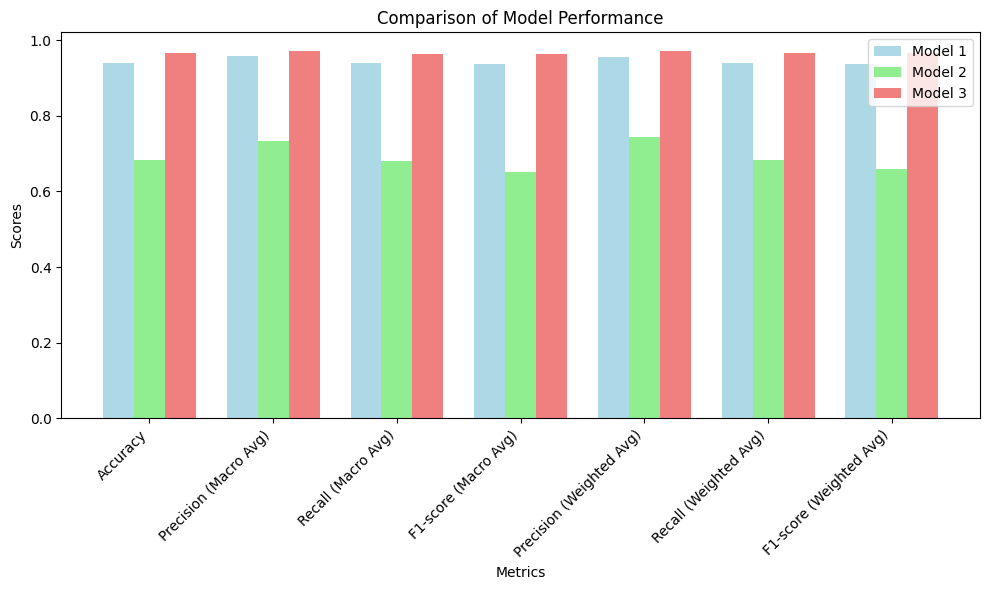

In [ ]:
# CNN models - metrics comparison

report_1 = classification_report(y_true, y_pred_classes_1, target_names=test_generator.class_indices.keys(), output_dict=True)
report_2 = classification_report(y_true, y_pred_classes_2, target_names=test_generator.class_indices.keys(), output_dict=True)
report_3 = classification_report(y_true, y_pred_classes_3, target_names=test_generator.class_indices.keys(), output_dict=True)

# Function to extract key metrics from the report
def extract_metrics(report_dict):
    accuracy = report_dict['accuracy']
    precision_macro = np.nan_to_num(report_dict['macro avg']['precision'], nan=0)
    recall_macro = np.nan_to_num(report_dict['macro avg']['recall'], nan=0)
    f1_macro = np.nan_to_num(report_dict['macro avg']['f1-score'], nan=0)
    precision_weighted = np.nan_to_num(report_dict['weighted avg']['precision'], nan=0)
    recall_weighted = np.nan_to_num(report_dict['weighted avg']['recall'], nan=0)
    f1_weighted = np.nan_to_num(report_dict['weighted avg']['f1-score'], nan=0)

    return accuracy, precision_macro, recall_macro, f1_macro, precision_weighted, recall_weighted, f1_weighted

# Extract metrics for each model
accuracy_1, precision_macro_1, recall_macro_1, f1_macro_1, precision_weighted_1, recall_weighted_1, f1_weighted_1 = extract_metrics(report_1)
accuracy_2, precision_macro_2, recall_macro_2, f1_macro_2, precision_weighted_2, recall_weighted_2, f1_weighted_2 = extract_metrics(report_2)
accuracy_3, precision_macro_3, recall_macro_3, f1_macro_3, precision_weighted_3, recall_weighted_3, f1_weighted_3 = extract_metrics(report_3)

# Create a DataFrame for comparison
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Macro Avg)', 'Recall (Macro Avg)', 'F1-score (Macro Avg)',
               'Precision (Weighted Avg)', 'Recall (Weighted Avg)', 'F1-score (Weighted Avg)'],
    'Model 1': [accuracy_1, precision_macro_1, recall_macro_1, f1_macro_1, precision_weighted_1, recall_weighted_1, f1_weighted_1],
    'Model 2': [accuracy_2, precision_macro_2, recall_macro_2, f1_macro_2, precision_weighted_2, recall_weighted_2, f1_weighted_2],
    'Model 3': [accuracy_3, precision_macro_3, recall_macro_3, f1_macro_3, precision_weighted_3, recall_weighted_3, f1_weighted_3]
})

# Define the metrics and values for each model
metrics = ['Accuracy', 'Precision (Macro Avg)', 'Recall (Macro Avg)', 'F1-score (Macro Avg)',
           'Precision (Weighted Avg)', 'Recall (Weighted Avg)', 'F1-score (Weighted Avg)']

# Metrics values from your models (replace with the actual values you calculated)
model_1_metrics = [accuracy_1, precision_macro_1, recall_macro_1, f1_macro_1, precision_weighted_1, recall_weighted_1, f1_weighted_1]
model_2_metrics = [accuracy_2, precision_macro_2, recall_macro_2, f1_macro_2, precision_weighted_2, recall_weighted_2, f1_weighted_2]
model_3_metrics = [accuracy_3, precision_macro_3, recall_macro_3, f1_macro_3, precision_weighted_3, recall_weighted_3, f1_weighted_3]

# Set the positions for the bars
x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each model
rects1 = ax.bar(x - width, model_1_metrics, width, label='Model 1', color='lightblue')
rects2 = ax.bar(x, model_2_metrics, width, label='Model 2', color='lightgreen')
rects3 = ax.bar(x + width, model_3_metrics, width, label='Model 3', color='lightcoral')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()



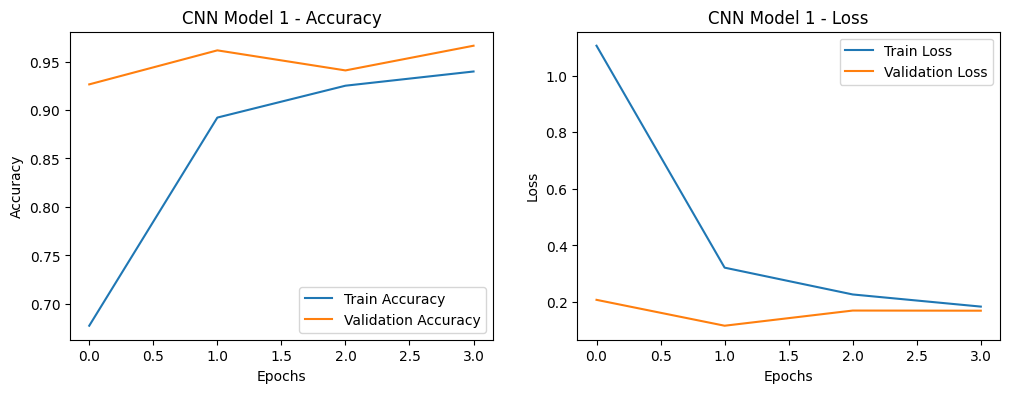

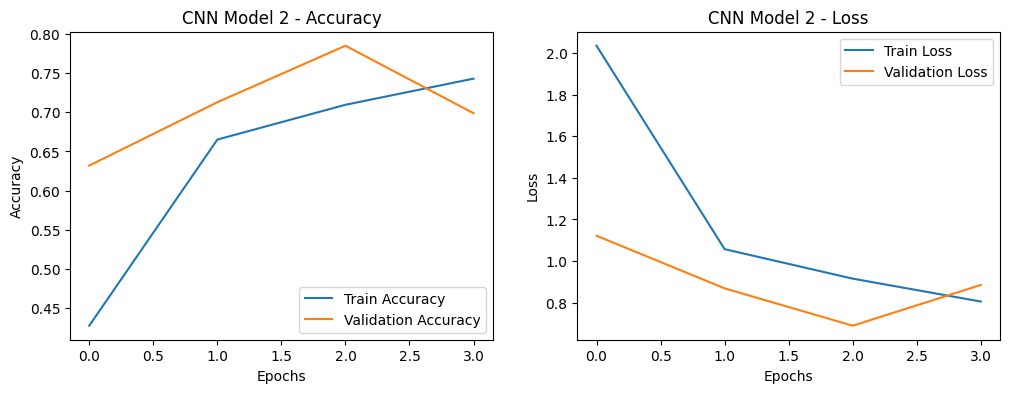

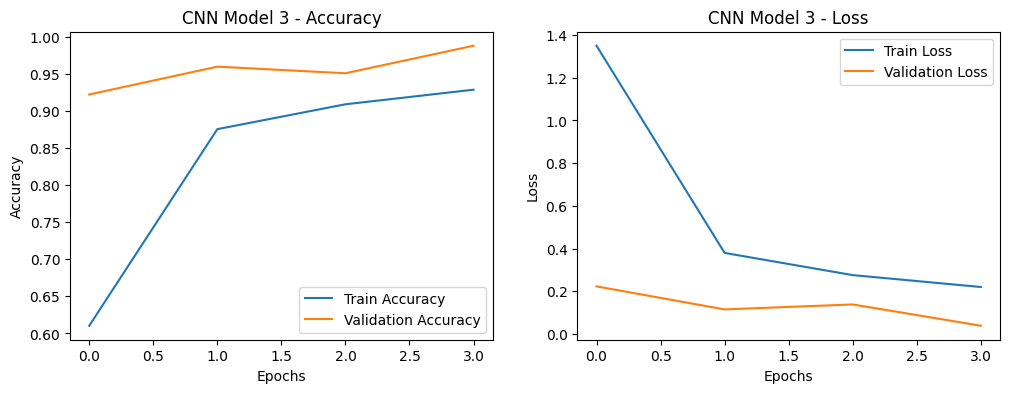

In [ ]:
# CNN models - accuracy and loss comparison

def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot for each model
plot_history(history_1, "CNN Model 1")
plot_history(history_2, "CNN Model 2")
plot_history(history_3, "CNN Model 3")


<!DOCTYPE html>
<html>
<head>
<style>
  body { font-family: sans-serif; }
  h2 { color: #337ab7; }
  .model-summary { border: 1px solid #ddd; padding: 15px; margin-bottom: 15px; border-radius: 5px; }
  .key-metric { font-weight: bold; }
  .overfitting-indicator { color: red; }
  .good-generalization { color: green; }
</style>
</head>
<body>

  <h2>Summary of CNN Models - Analysis and Comparison</h2>

  <div class="model-summary">
    <h3>CNN Model 1</h3>
    <ul>
      <li><span class="key-metric">Test Accuracy:</span> 94%</li>
      <li>Showed good overall performance.</li>
      <li>Training and validation curves indicated <span class="overfitting-indicator">early signs of potential overfitting</span> after the second epoch (increasing validation loss, plateauing validation accuracy).</li>
      <li>Achieved high precision and recall for many classes but struggled with some specific categories.</li>
    </ul>
  </div>

  <div class="model-summary">
    <h3>CNN Model 2</h3>
    <ul>
      <li><span class="key-metric">Test Accuracy:</span> 68%</li>
      <li>Significantly lower performance compared to Models 1 and 3.</li>
      <li>Training and validation curves clearly showed <span class="overfitting-indicator">overfitting</span> (peaking and then decreasing validation accuracy, increasing validation loss in the final epoch).</li>
      <li>Struggled with generalization across a large number of classes.</li>
    </ul>
  </div>

  <div class="model-summary">
    <h3>CNN Model 3</h3>
    <ul>
      <li><span class="key-metric">Test Accuracy:</span> 97%</li>
      <li>Demonstrated the <span class="good-generalization">best overall performance</span>.</li>
      <li>Training and validation curves indicated <span class="good-generalization">good generalization</span> with consistently improving validation accuracy and decreasing validation loss. Minimal signs of overfitting within the 4 epochs.</li>
      <li>Achieved perfect precision and recall for several classes.</li>
    </ul>
  </div>

  <h2>Key Takeaways</h2>
  <ul>
    <li><span class="key-metric">Model 3 is the preferred model</span> due to its superior generalization and minimal signs of overfitting.</li>
    <li>Model 1 performed well but showed early signs of potential overfitting.</li>
    <li>Model 2 suffered from significant overfitting and exhibited poor generalization.</li>
  </ul>

</body>
</html>

<!DOCTYPE html>
<html>
<head>
<style>
  body { font-family: sans-serif; }
  p { margin-bottom: 10px; }
  .reason { font-weight: bold; color: green; }
  .caveat { font-weight: bold; color: orange; }
</style>
</head>
<body>

  <h2>Why CNN Model 3's Metrics Don't Necessarily Mean Overfitting</h2>

  <p>CNN Model 3 has almost 49% of classes with precision and recall of 1.0. While perfect precision and recall (1.0) for many classes can sometimes raise suspicion of overfitting, in the case of CNN Model 3, several factors suggest it's more likely a sign of good learning for those specific categories:</p>

  <ul>
    <li><p><span class="reason">Strong Overall Generalization:</span> Model 3 achieved high accuracy and F1-scores on the entire test set, and its validation performance consistently improved. This indicates good generalization to unseen data, which is the opposite of overfitting.</p></li>
    <li><p><span class="reason">Distinct Classes and Sufficient Data:</span> Many fruit and vegetable classes are visually distinct. If the model had enough training data for these categories, it could genuinely learn to classify them perfectly.</p></li>
    <li><p><span class="reason">Consistent Validation Performance:</span> The high validation accuracy, which also improved during training, suggests the model's perfect performance on these classes wasn't just memorization of the training set.</p></li>
    <li><p><span class="reason">No Trade-off with Other Classes:</span> The good performance on these perfectly classified classes didn't come at the cost of significantly worse performance on other classes.</p></li>
  </ul>

  <p class="caveat">It's important to note that perfect metrics should still be interpreted with caution, especially if the support for those classes is very low. However, given Model 3's overall strong performance and learning curves, it's more likely that it effectively learned the distinguishing features for those specific, potentially easier-to-classify, categories.</p>

</body>
</html>